# Giới thiệu data

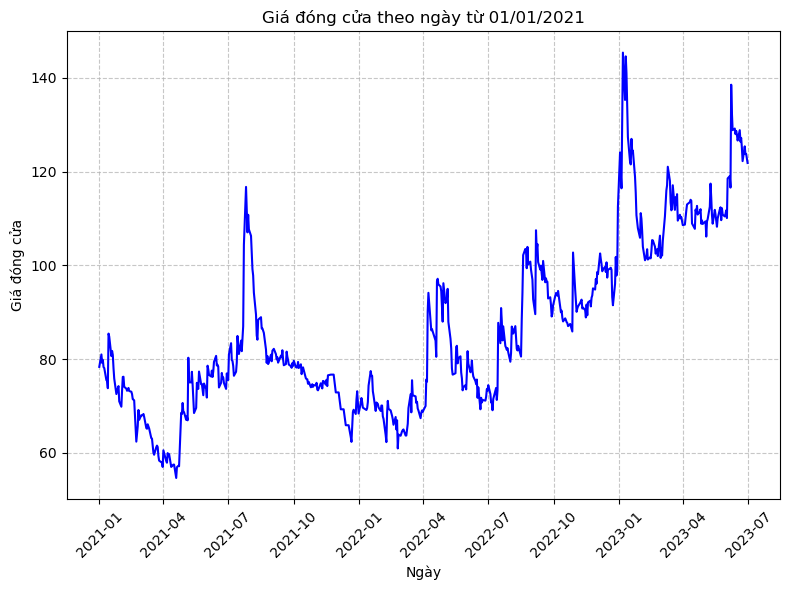

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Data về giá cổ phiếu của tập đoàn TAINWALCHM
data = pd.read_csv("TAINWALCHM.csv", parse_dates=['Date'])

df_filtered = data[data['Date'] >= '2021-01-01']

plt.figure(figsize=(8, 6))
plt.plot(df_filtered['Date'], df_filtered['Close'], linestyle='-', color='blue')

plt.title('Giá đóng cửa theo ngày từ 01/01/2021')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa')
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [15]:
# Train test split
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

X = data.drop(['Close', 'Adj Close', 'Volume'], axis=1)  # Drop the target column 'Close'
y = data['Close']
X_train = X.loc[:'2020-12-31'] 
X_test = X.loc['2021-01-01':'2023-06-01'] 
y_train = y.loc[:'2020-12-31'] 
y_test = y.loc['2021-01-01':'2023-06-01'] 

# Random Forest

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest with Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2']
}

rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_
print(best_rf_model)

# Make predictions on the test set
rf_test_pred = best_rf_model.predict(X_test)

# Evaluate performance using RMSE and R² on the test set
test_rmse = root_mean_squared_error(y_test, rf_test_pred)
test_r2 = r2_score(y_test, rf_test_pred)

print(f'Random Forest Test RMSE: {test_rmse:.4f}')
print(f'Random Forest Test R2: {test_r2:.4f}')


RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=50,
                      random_state=42)
Random Forest Test RMSE: 2.2220
Random Forest Test R2: 0.9826


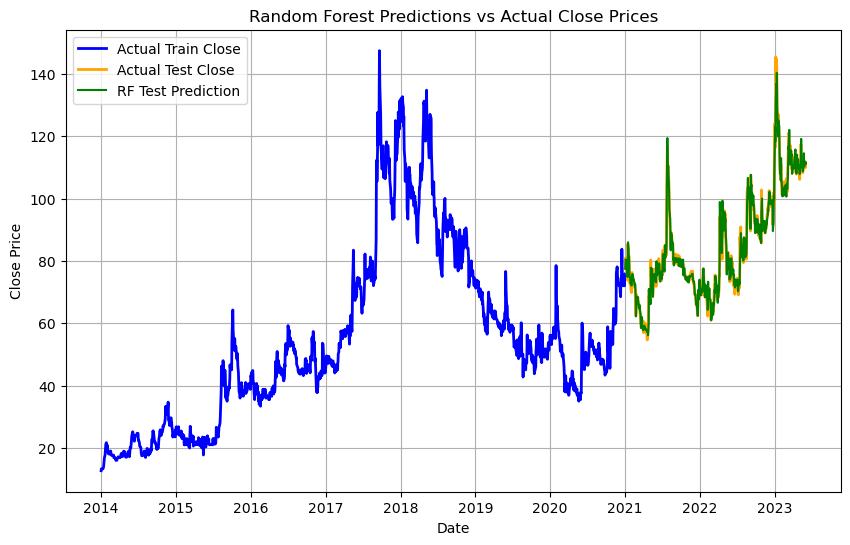

In [16]:

# Plot actual and predicted values for the test set, and include training data in blue
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual training values in blue
ax.plot(X_train.index, y_train, label='Actual Train Close', color='blue', linewidth=2)

# Plot actual test values in orange
ax.plot(X_test.index, y_test, label='Actual Test Close', color='orange', linewidth=2)

# Plot Random Forest predictions in green
ax.plot(X_test.index, rf_test_pred, label='RF Test Prediction', color='green')

# Add titles, labels, and legend
ax.set_title('Random Forest Predictions vs Actual Close Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.legend()

# Enable grid
plt.grid(True)

# Show the plot
plt.show()

# XG-Boost

In [13]:
from xgboost import XGBRegressor

# XGBoost with Grid Search
param_grid = {
    'n_estimators': [50, 100, 150, 500, 1000],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5]
}

xgb_model = XGBRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set
xgb_test_pred = best_xgb_model.predict(X_test)

# Evaluate performance using RMSE and R² on the test set
test_rmse = root_mean_squared_error(y_test, xgb_test_pred)
test_r2 = r2_score(y_test, xgb_test_pred)

print(f'XGB Test RMSE: {test_rmse}')
print(f'XGB Test R2: {test_r2:.4f}')


XGB Test RMSE: 2.1209947275474157
XGB Test R2: 0.9841


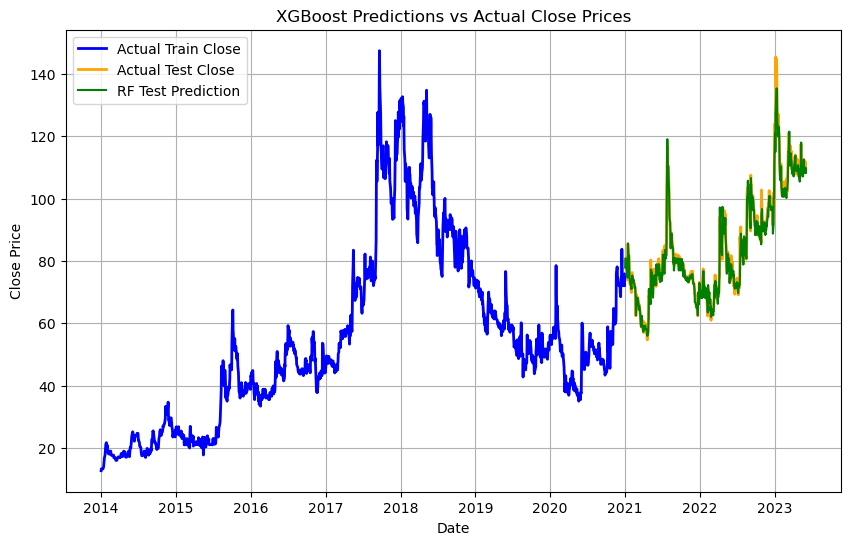

In [14]:
# Plot actual and predicted values for the test set, and include training data in blue
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual training values in blue
ax.plot(X_train.index, y_train, label='Actual Train Close', color='blue', linewidth=2)

# Plot actual test values in orange
ax.plot(X_test.index, y_test, label='Actual Test Close', color='orange', linewidth=2)

# Plot Random Forest predictions in green
ax.plot(X_test.index, xgb_test_pred, label='RF Test Prediction', color='green')

# Add titles, labels, and legend
ax.set_title('XGBoost Predictions vs Actual Close Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.legend()

# Enable grid
plt.grid(True)

# Show the plot
plt.show()

# Random forest + XGBoost + LSTM

In [22]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler

# ------------------------------
# Step 1: Train Random Forest with GridSearch
# ------------------------------
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2']
}

rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='neg_mean_squared_error', cv=5)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

# ------------------------------
# Step 2: Train XGBoost with GridSearch
# ------------------------------
param_grid_xgb = {
    'n_estimators': [50, 100, 150, 500, 1000],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01]
}

xgb_model = XGBRegressor(random_state=42)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, scoring='neg_mean_squared_error', cv=5)
grid_search_xgb.fit(X_train, y_train)
best_xgb_model = grid_search_xgb.best_estimator_

# ------------------------------
# Step 3: Train LSTM Model
# ------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32)

# ------------------------------
# Step 4: Get Predictions on Training Data
# ------------------------------
rf_train_preds = best_rf_model.predict(X_train)
xgb_train_preds = best_xgb_model.predict(X_train)
lstm_train_preds = lstm_model.predict(X_train_lstm).reshape(-1)


Epoch 1/50


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 3811.6221
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3130.5894
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1141.9854
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 169.1333
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34.3642
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 31.1397
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28.0341
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29.7487
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.2384
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.2672
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.1788
Epoch 12/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.4559
Epoch 13/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.9773
Epoch 14/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17.6578
Epoch 15/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15.6901
Epoch 16

In [41]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
import numpy as np

# ------------------------------
# Step 1: Define OOF Prediction Function
# ------------------------------
def get_oof_predictions(model, X, y, X_test, n_splits=5):
    """
    Generate Out-of-Fold (OOF) predictions for stacking.
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    oof_train = np.zeros(X.shape[0])
    oof_test = np.zeros(X_test.shape[0])
    oof_test_skf = np.empty((n_splits, X_test.shape[0]))

    for i, (train_idx, valid_idx) in enumerate(kf.split(X)):
        # Use .iloc to correctly index DataFrames
        X_tr, X_val = X.iloc[train_idx], X.iloc[valid_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[valid_idx]

        model.fit(X_tr, y_tr)
        oof_train[valid_idx] = model.predict(X_val)
        oof_test_skf[i, :] = model.predict(X_test)

    # Average predictions across folds for the test set
    oof_test[:] = oof_test_skf.mean(axis=0)

    return oof_train, oof_test

# ------------------------------
# Step 2: Generate OOF Predictions for Base Models
# ------------------------------
rf_oof_train, rf_oof_test = get_oof_predictions(best_rf_model, X_train, y_train, X_test)
xgb_oof_train, xgb_oof_test = get_oof_predictions(best_xgb_model, X_train, y_train, X_test)

# For LSTM, we need to handle predictions separately
lstm_train_preds = lstm_model.predict(X_train_lstm).reshape(-1)
lstm_test_preds = lstm_model.predict(X_test_lstm).reshape(-1)

# ------------------------------
# Step 3: Create Stacked Training and Test Data
# ------------------------------
scaler = StandardScaler()
original_features_train = scaler.fit_transform(X_train[['Open', 'Low', 'High']])
original_features_test = scaler.transform(X_test[['Open', 'Low', 'High']])

stacked_train = np.column_stack((rf_oof_train, xgb_oof_train, lstm_train_preds, original_features_train))
stacked_test = np.column_stack((rf_oof_test, xgb_oof_test, lstm_test_preds, original_features_test))


# ------------------------------
# Step 3: Train Meta model
# ------------------------------
meta_model = Ridge(alpha=1.0)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
meta_predictions = np.zeros(y_test.shape)

for train_idx, val_idx in kf.split(stacked_train):
    X_meta_train, X_meta_val = stacked_train[train_idx], stacked_train[val_idx]
    y_meta_train, y_meta_val = y_train[train_idx], y_train[val_idx]

    meta_model.fit(X_meta_train, y_meta_train)
    meta_predictions += meta_model.predict(stacked_test) / kf.n_splits

# ------------------------------
# Step 5: Make Final Predictions
# ------------------------------
final_preds = meta_model.predict(stacked_test)

# ------------------------------
# Step 6: Evaluate Model Performance
# ------------------------------
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} RMSE: {rmse:.4f}')
    print(f'{model_name} R2: {r2:.4f}')

# Evaluate stacked ensemble model
evaluate_model(y_test, final_preds, "Stacked Ensemble")


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step
Stacked Ensemble RMSE: 1.5155
Stacked Ensemble R2: 0.9919


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10320\3554612036.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_meta_train, y_meta_val = y_train[train_idx], y_train[val_idx]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10320\3554612036.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_meta_train, y_meta_val = y_train[train_idx], y_train[val_idx]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10320\3554612036.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value b

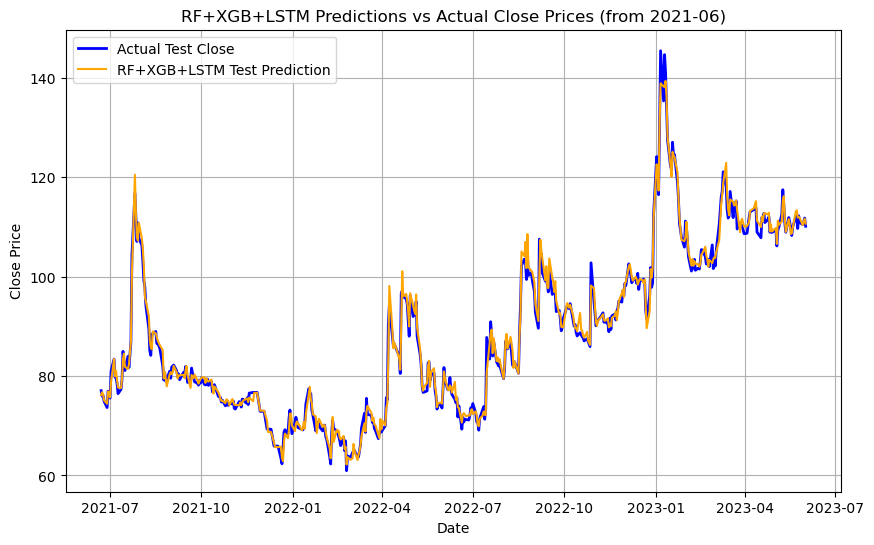

In [46]:
import matplotlib.pyplot as plt

# Filter the data to include only values from '2021-06' onward
start_date = '2021-06-22'
filtered_test_index = X_test.index[X_test.index >= start_date]

# Plot actual and predicted values for the filtered test set
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual test values in orange (from 2021-06 onward)
ax.plot(filtered_test_index, y_test[filtered_test_index], 
        label='Actual Test Close', color='blue', linewidth=2)

# Plot ensemble predictions in green (from 2021-06 onward)
ax.plot(filtered_test_index, final_preds[X_test.index >= start_date], 
        label='RF+XGB+LSTM Test Prediction', color='orange')

# Add titles, labels, and legend
ax.set_title('RF+XGB+LSTM Predictions vs Actual Close Prices (from 2021-06)')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.legend()

# Enable grid
plt.grid(True)

# Show the plot
plt.show()
